# Questions To Answer
- How does trading volume vary across different sectors or symbols?
- What does this variation indicate about stock liquidity and investor interest?

## Objective 
- Investigate trading volume trends as a measure of stock liquidity or investor interest

## Methodology
- Aggregate Volume by Sector
- Visualize Volume Trends
- Volume Analysis for Specific Stocks

In [39]:
# Loading Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Loading merged datasets
df_merged = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Data_Analyst\S&P_500\sp500_data\cleaned_merged_stock_data.csv')

In [40]:
# Aggregate Volume by Sector
sector_volume = df_merged.groupby(['Date', 'Sector'])['Volume'].sum().unstack()

<Figure size 1400x700 with 0 Axes>

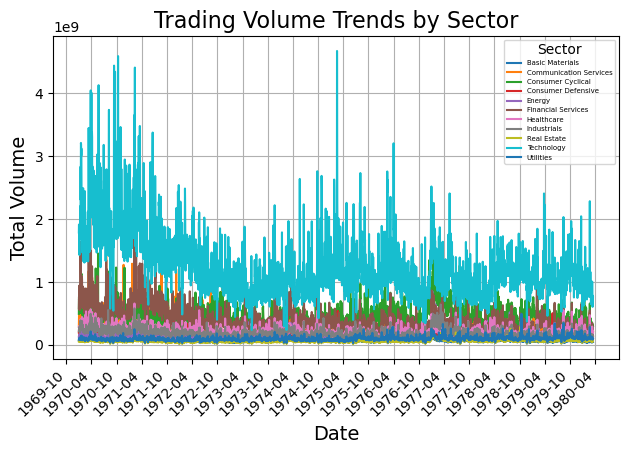

In [44]:
# Visualize Volume Trends

# Plot volume trend for sectors
plt.figure(figsize=(14, 7))
sector_volume.plot()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set title and labels
plt.title('Trading Volume Trends by Sector', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Volume', fontsize=14)

# Adjust legend position and size
plt.legend(title='Sector',fontsize='5')

# Optimize layout to prevent overlap
plt.tight_layout()
plt.grid(True)

# Improve x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Display every 3rd month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Show the plot
plt.show()


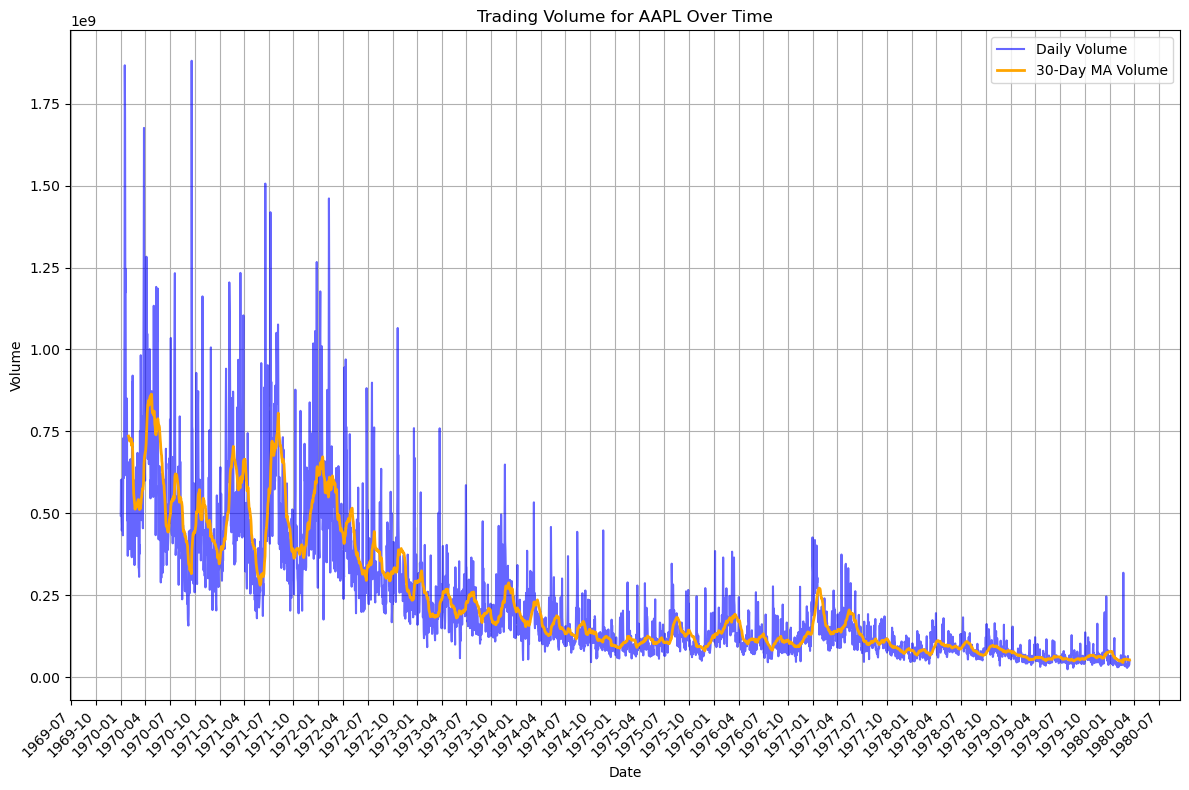

In [42]:
# Volume Analysis for Specific Stocks

# Calculate the 30-day moving average of volume
df_merged['Volume_MA'] = df_merged.groupby('Symbol')['Volume'].rolling(window=30).mean().reset_index(0, drop=True)

# Plot volume trend for a single stock
symbol = 'AAPL'
stock_vol = df_merged[df_merged['Symbol'] == symbol]

plt.figure(figsize=(12, 8))

# Plot daily volume
plt.plot(stock_vol['Date'], stock_vol['Volume'], label='Daily Volume', color='blue', alpha=0.6)

# Plot 30-day moving average volume
plt.plot(stock_vol['Date'], stock_vol['Volume_MA'], label='30-Day MA Volume', color='orange', linewidth=2)

# Improve x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Display every 3rd month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.title(f'Trading Volume for {symbol} Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
